<a href="https://colab.research.google.com/github/pullz6/Predicting_Gambling_Tendency/blob/main/Predicting_gambling_withXGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier

In [ ]:
#Importing the datasets
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/sample_data/Projects/Credit_Score/credit_score.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.drop(['CUST_ID','DEFAULT'],inplace=True,axis=1)
df.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,High,1,0,0,0,0,444
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,No,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,High,1,0,0,1,0,469
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.0000,1.2500,0.1282,High,1,0,0,1,0,559
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,High,1,1,1,1,1,473


In [ ]:
df = df.drop(df.filter(regex='R_').columns, axis=1)

In [ ]:
df.head()

,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_CLOTHING_6,T_EDUCATION_12,T_EDUCATION_6,T_ENTERTAINMENT_12,T_ENTERTAINMENT_6,T_FINES_12,...,T_UTILITIES_6,T_EXPENDITURE_12,T_EXPENDITURE_6,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,1889,945,0,0,3068,1554,0,...,469,33269,19286,High,1,0,0,0,0,444
1,77158,91187,315648,5818,111,0,0,17244,8694,0,...,1423,70144,25114,No,1,0,0,1,0,625
2,30917,21642,534864,1157,860,0,0,3611,2231,36,...,431,30917,17618,High,1,0,0,1,0,469
3,80657,64526,629125,6857,3686,4402,2215,13446,6849,0,...,1112,80657,40205,High,1,0,0,1,0,559
4,149971,1172498,2399531,1978,322,0,0,5194,2675,0,...,5190,136337,62766,High,1,1,1,1,1,473


In [ ]:
df = df.drop(df.filter(regex='6$').columns, axis=1)

In [ ]:
df.head()

,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_EDUCATION_12,T_ENTERTAINMENT_12,T_FINES_12,T_GAMBLING_12,T_GROCERIES_12,T_HEALTH_12,...,T_TRAVEL_12,T_UTILITIES_12,T_EXPENDITURE_12,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,1889,0,3068,0,1313,4849,320,...,17893,931,33269,High,1,0,0,0,0,444
1,77158,91187,315648,5818,0,17244,0,0,5224,467,...,20234,2845,70144,No,1,0,0,1,0,625
2,30917,21642,534864,1157,0,3611,36,1201,4335,891,...,16072,855,30917,High,1,0,0,1,0,469
3,80657,64526,629125,6857,4402,13446,0,7796,4547,2068,...,25038,2209,80657,High,1,0,0,1,0,559
4,149971,1172498,2399531,1978,0,5194,0,1734,34814,7513,...,28167,10338,136337,High,1,1,1,1,1,473


Checking to see the unique values of gambling.

In [ ]:
df['CAT_GAMBLING'].unique()

array(['High', 'No', 'Low'], dtype=object)

Data pre-processing, converting the categorical values into numerical values with a dictionary.

In [ ]:
map = {"High":2,"Low":1,"No":0}
df.replace({"CAT_GAMBLING":map},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   INCOME               1000 non-null   int64
 1   SAVINGS              1000 non-null   int64
 2   DEBT                 1000 non-null   int64
 3   T_CLOTHING_12        1000 non-null   int64
 4   T_EDUCATION_12       1000 non-null   int64
 5   T_ENTERTAINMENT_12   1000 non-null   int64
 6   T_FINES_12           1000 non-null   int64
 7   T_GAMBLING_12        1000 non-null   int64
 8   T_GROCERIES_12       1000 non-null   int64
 9   T_HEALTH_12          1000 non-null   int64
 10  T_HOUSING_12         1000 non-null   int64
 11  T_TAX_12             1000 non-null   int64
 12  T_TRAVEL_12          1000 non-null   int64
 13  T_UTILITIES_12       1000 non-null   int64
 14  T_EXPENDITURE_12     1000 non-null   int64
 15  CAT_GAMBLING         1000 non-null   int64
 16  CAT_DEBT             1000

In [ ]:
df = df[[col for col in df.columns if col != 'CAT_GAMBLING'] + ['CAT_GAMBLING']]

In [ ]:
df.head()

,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_EDUCATION_12,T_ENTERTAINMENT_12,T_FINES_12,T_GAMBLING_12,T_GROCERIES_12,T_HEALTH_12,...,T_TRAVEL_12,T_UTILITIES_12,T_EXPENDITURE_12,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,CAT_GAMBLING
0,33269,0,532304,1889,0,3068,0,1313,4849,320,...,17893,931,33269,1,0,0,0,0,444,2
1,77158,91187,315648,5818,0,17244,0,0,5224,467,...,20234,2845,70144,1,0,0,1,0,625,0
2,30917,21642,534864,1157,0,3611,36,1201,4335,891,...,16072,855,30917,1,0,0,1,0,469,2
3,80657,64526,629125,6857,4402,13446,0,7796,4547,2068,...,25038,2209,80657,1,0,0,1,0,559,2
4,149971,1172498,2399531,1978,0,5194,0,1734,34814,7513,...,28167,10338,136337,1,1,1,1,1,473,2


In [ ]:
df.fillna(0)

,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_EDUCATION_12,T_ENTERTAINMENT_12,T_FINES_12,T_GAMBLING_12,T_GROCERIES_12,T_HEALTH_12,...,T_TRAVEL_12,T_UTILITIES_12,T_EXPENDITURE_12,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,CAT_GAMBLING
0,33269,0,532304,1889,0,3068,0,1313,4849,320,...,17893,931,33269,1,0,0,0,0,444,2
1,77158,91187,315648,5818,0,17244,0,0,5224,467,...,20234,2845,70144,1,0,0,1,0,625,0
2,30917,21642,534864,1157,0,3611,36,1201,4335,891,...,16072,855,30917,1,0,0,1,0,469,2
3,80657,64526,629125,6857,4402,13446,0,7796,4547,2068,...,25038,2209,80657,1,0,0,1,0,559,2
4,149971,1172498,2399531,1978,0,5194,0,1734,34814,7513,...,28167,10338,136337,1,1,1,1,1,473,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,328892,1465066,5501471,16701,0,9778,0,3216,74781,14270,...,74298,19305,298993,1,1,1,1,1,418,2
996,81404,88805,680837,5400,0,28839,0,0,7033,1737,...,24625,3480,74004,1,0,0,1,0,589,0
997,0,42428,30760,0,0,0,0,0,608,147,...,8804,268,10607,1,0,0,1,0,499,0
998,36011,8002,604181,1993,9622,3587,0,0,6049,871,...,13244,1097,40012,1,1,0,1,0,507,0


Prepping the data prior to the fitting.

In [ ]:
X = df[list(df.columns[:20])]
Y = df['CAT_GAMBLING']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, train_size = 0.7,stratify=Y)

Building the XGBoost classifier.

In [ ]:
xgb = XGBClassifier(objective="multi:softmax")
xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:1.00000
[1]	validation_0-aucpr:1.00000
[2]	validation_0-aucpr:1.00000
[3]	validation_0-aucpr:1.00000
[4]	validation_0-aucpr:1.00000
[5]	validation_0-aucpr:1.00000
[6]	validation_0-aucpr:1.00000
[7]	validation_0-aucpr:1.00000
[8]	validation_0-aucpr:1.00000
[9]	validation_0-aucpr:1.00000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
y_pred = xgb.predict(X_test)

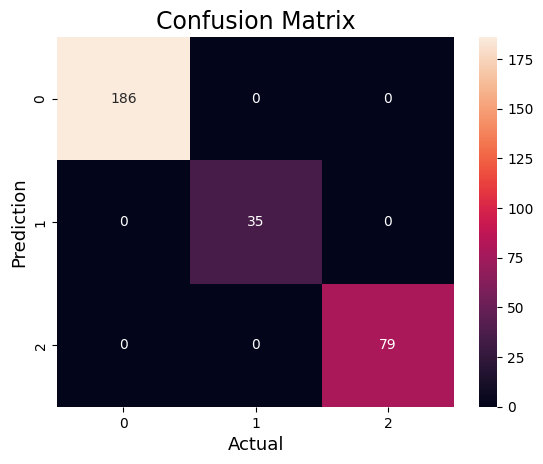

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()